In [2]:
from sportsipy.nba.teams import Teams
from scipy.stats import pearsonr
from scipy.stats import skew,kurtosis
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

In [3]:
teamcList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i in range(len(teams)):
        teamcList.append(len(teams))

In [4]:
counter=collections.Counter(teamcList)
yv = list(counter.values())
yk = list(counter.keys())
yearV = []
for k,v in zip(yk,yv):
    yearV.append(int(v/k))
print(pd.DataFrame((zip(yk,yv,yearV)),columns=['teams','freq','numSeasons']).to_string(index=False))
print('\navg # teams: '+str(round(np.average(yk, weights=yv),2))+'\ntotal seasons: '+str(sum(yearV)))

 teams  freq  numSeasons
    14    14           1
    17    68           4
    18    36           2
    22    88           4
    23   184           8
    25    25           1
    27   162           6
    29   261           9
    30   480          16

avg # teams: 26.66
total seasons: 51


In [10]:
import pickle
with open('teamcNBA.data', 'wb') as filehandle:
    pickle.dump(teamcList, filehandle)

In [1]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []

for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        df = team.schedule.dataframe
        df = df[df['playoffs'] == False]
        W = max(df['wins'])
        L = max(df['losses'])
        G = max(df['game'])
        GF = sum(df['points_scored'])
        GA = sum(df['points_allowed'])
        statd[i] = {'Team' : team.name,
            'W' : W,
            'L' : L,
            'G' : G,
            'WinPct' : round(100*W/G,3),
            'GF' : GF,
            'GA' : GA,
            'GD' : GF-GA,
            'GfrPct' : round(100*GF/(GF+GA),3),
            'GD_per' : round((GF-GA)/G,2)}
                    
    df = pd.DataFrame(statd)
    df = df.transpose()

    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))
        
print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))

Correlation(WinRatio,GoalsForRatio)

1970: 0.917 (new min) (new max)
1971: 0.979 (new max)
1972: 0.975
1973: 0.982 (new max)
1974: 0.952
1975: 0.942
1976: 0.945
1977: 0.879 (new min)
1978: 0.956
1979: 0.913
1980: 0.965
1981: 0.986 (new max)
1982: 0.984
1983: 0.976
1984: 0.956
1985: 0.96
1986: 0.927
1987: 0.975
1988: 0.986
1989: 0.978
1990: 0.971
1991: 0.988 (new max)
1992: 0.959
1993: 0.961
1994: 0.975
1995: 0.946
1996: 0.984
1997: 0.971
1998: 0.981
1999: 0.968
2000: 0.969
2001: 0.978
2002: 0.977
2003: 0.977
2004: 0.977
2005: 0.974
2006: 0.948
2007: 0.949
2008: 0.979
2009: 0.99 (new max)
2010: 0.973
2011: 0.971
2012: 0.962
2013: 0.972
2014: 0.97
2015: 0.977
2016: 0.977
2017: 0.964
2018: 0.956
2019: 0.98
2020: 0.96
MIN:1977 (0.879)
MAX:2009 (0.99)
AVG:0.965


In [45]:
'''
1970-2020
MIN:1977 (0.879)
MAX:2009 (0.99)
AVG:0.965
'''

0.96532

In [3]:
year=2009
teams = list(Teams(year))
statd = {}
    
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        df = team.schedule.dataframe
        df = df[df['playoffs'] == False]
        W = max(df['wins'])
        L = max(df['losses'])
        G = max(df['game'])
        GF = sum(df['points_scored'])
        GA = sum(df['points_allowed'])
        statd[i] = {'Team' : team.name,
            'W' : W,
            'L' : L,
            'G' : G,
            'WinPct' : round(100*W/G,3),
            'GF' : GF,
            'GA' : GA,
            'GD' : GF-GA,
            'GfrPct' : round(100*GF/(GF+GA),3),
            'GD_per' : round((GF-GA)/G,2)}

df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))].head(1)
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

2020 Luckiest,Median,Unluckiest Teams:
             Team   W   L   G    GF    GA  WinPct   GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
   Indiana Pacers  45  28  73  7989  7846  61.644  143   1.96  50.452     6    12      6     0  11.644
     Phoenix Suns  34  39  73  8294  8278  46.575   16   0.22  50.048    15    13     -2    22  -3.425
 Dallas Mavericks  43  32  75  8776  8405  57.333  371   4.95   51.08    12     5     -7    29   7.333


In [4]:
'''
1977 Luckiest,Median,Unluckiest Teams: (most anomolous)
            Team   W   L   G    GF    GA    GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50
  Boston Celtics  44  38  82  8572  8734  -162  53.659  -1.98     7   16      9     0   3.659
 New York Knicks  40  42  82  8905  8906    -1   48.78  -0.01    12   12      0    12   -1.22
    Phoenix Suns  34  48  82  8603  8543    60  41.463   0.73    17   10     -7    21  -8.537

2009 Luckiest,Median,Unluckiest Teams: (most predictable)
               Team   W   L   G    GF    GA   GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50
     Denver Nuggets  54  28  82  8555  8275  280  65.854   3.41     4    7      3     0  15.854
 Philadelphia 76ers  41  41  82  7987  7981    6      50   0.07    14   14      0    11       0
    Houston Rockets  53  29  82  8070  7742  328  64.634      4     7    5     -2    26  14.634
'''

'\n1977 Luckiest,Median,Unluckiest Teams: (most anomolous)\n            Team   W   L   G    GF    GA    GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50\n  Boston Celtics  44  38  82  8572  8734  -162  53.659  -1.98     7   16      9     0   3.659\n New York Knicks  40  42  82  8905  8906    -1   48.78  -0.01    12   12      0    12   -1.22\n    Phoenix Suns  34  48  82  8603  8543    60  41.463   0.73    17   10     -7    21  -8.537\n\n2009 Luckiest,Median,Unluckiest Teams: (most predictable)\n               Team   W   L   G    GF    GA   GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50\n     Denver Nuggets  54  28  82  8555  8275  280  65.854   3.41     4    7      3     0  15.854\n Philadelphia 76ers  41  41  82  7987  7981    6      50   0.07    14   14      0    11       0\n    Houston Rockets  53  29  82  8070  7742  328  64.634      4     7    5     -2    26  14.634\n'

In [15]:
year=1970
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    df = team.schedule.dataframe
    df = df[df['playoffs'] == False]
    W = max(df['wins'])
    L = max(df['losses'])
    G = max(df['game'])
    GF = sum(df['points_scored'])
    GA = sum(df['points_allowed'])
    statd[i] = {'Team' : team.name,
        'W' : W,
        'L' : L,
        'G' : G,
        'WinPct' : round(100*W/G,3),
        'GF' : GF,
        'GA' : GA,
        'GD' : GF-GA,
        'GfrPct' : round(100*GF/(GF+GA),3),
        'GD_per' : round((GF-GA)/G,2)}

df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
print('%s NBA Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s NBA Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s NBA Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

1970 NBA Season - Ranked by % Games Won [>LosPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
8,New York Knicks,60,22,82,9427,8682,73.171,9.09,52.057,0,0,0,6
3,Milwaukee Bucks,56,26,82,9741,9363,68.293,4.61,50.989,1,1,0,6
1,Baltimore Bullets,50,32,82,9900,9726,60.976,2.12,50.443,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Detroit Pistons,31,51,82,9246,9518,37.805,-3.32,49.275,11,12,1,1
13,San Francisco Warriors,30,52,82,9114,9476,36.585,-4.41,49.026,12,13,1,1
4,San Diego Rockets,27,55,82,9732,9986,32.927,-3.1,49.356,13,11,-2,11



1970 NBA Season - Ranked by % Points Scored [<GfrPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
8,New York Knicks,60,22,82,9427,8682,73.171,9.09,52.057,0,0,0,6
3,Milwaukee Bucks,56,26,82,9741,9363,68.293,4.61,50.989,1,1,0,6
0,Philadelphia 76ers,42,40,82,9998,9718,51.22,3.41,50.71,5,2,-3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,San Diego Rockets,27,55,82,9732,9986,32.927,-3.1,49.356,13,11,-2,11
12,Detroit Pistons,31,51,82,9246,9518,37.805,-3.32,49.275,11,12,1,1
13,San Francisco Warriors,30,52,82,9114,9476,36.585,-4.41,49.026,12,13,1,1



1970 NBA Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
5,Atlanta Hawks,48,34,82,9646,9612,58.537,0.41,50.088,3,5,2,0
1,Baltimore Bullets,50,32,82,9900,9726,60.976,2.12,50.443,2,3,1,1
7,Seattle SuperSonics,36,46,82,9589,9796,43.902,-2.52,49.466,8,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Boston Celtics,34,48,82,9422,9574,41.463,-1.85,49.6,10,8,-2,11
4,San Diego Rockets,27,55,82,9732,9986,32.927,-3.1,49.356,13,11,-2,11
0,Philadelphia 76ers,42,40,82,9998,9718,51.22,3.41,50.71,5,2,-3,13


In [6]:
'''
                      Team   W   L   G    GF    GA    GD    Rwin   GD_per  Iwin  Idiff
2009 Golden State Warriors  29  53  82  8905  9212  -307  0.3537  -3.7439    23     23
2010 Golden State Warriors  26  56  82  8922  9217  -295  0.3171  -3.5976    25     21
2011 Golden State Warriors  36  46  82  8477  8668  -191   0.439  -2.3293    19     20
2012 Golden State Warriors  23  43  66  6453  6678  -225  0.3485  -3.4091    22     22
2013 Golden State Warriors  47  35  82  8296  8223    73  0.5732   0.8902     9     11
2014 Golden State Warriors  51  31  82  8549  8155   394   0.622   4.8049     7      3
2015 Golden State Warriors  67  15  82  9016  8188   828  0.8171  10.0976     0      0
2016 Golden State Warriors  73   9  82  9421  8539   882  0.8902  10.7561     0      0
2017 Golden State Warriors  67  15  82  9503  8549   954  0.8171  11.6341     0      0
2018 Golden State Warriors  58  24  82  9304  8814   490  0.7073   5.9756     2      2
2019 Golden State Warriors  57  25  82  9650  9120   530  0.6951   6.4634     2      1
2020 Golden State Warriors  15  50  65  6912  7478  -566  0.2308  -8.7077    29     29
'''

'\n                      Team   W   L   G    GF    GA    GD    Rwin   GD_per  Iwin  Idiff\n2009 Golden State Warriors  29  53  82  8905  9212  -307  0.3537  -3.7439    23     23\n2010 Golden State Warriors  26  56  82  8922  9217  -295  0.3171  -3.5976    25     21\n2011 Golden State Warriors  36  46  82  8477  8668  -191   0.439  -2.3293    19     20\n2012 Golden State Warriors  23  43  66  6453  6678  -225  0.3485  -3.4091    22     22\n2013 Golden State Warriors  47  35  82  8296  8223    73  0.5732   0.8902     9     11\n2014 Golden State Warriors  51  31  82  8549  8155   394   0.622   4.8049     7      3\n2015 Golden State Warriors  67  15  82  9016  8188   828  0.8171  10.0976     0      0\n2016 Golden State Warriors  73   9  82  9421  8539   882  0.8902  10.7561     0      0\n2017 Golden State Warriors  67  15  82  9503  8549   954  0.8171  11.6341     0      0\n2018 Golden State Warriors  58  24  82  9304  8814   490  0.7073   5.9756     2      2\n2019 Golden State Warriors  5

In [7]:
minDelta = 0
maxDelta = 0
deltaList = []
dlpctList = []
dlptfList = []
dlpttList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        df = team.schedule.dataframe
        df = df[df['playoffs'] == False]
        W = max(df['wins'])
        G = max(df['game'])
        GF = sum(df['points_scored'])
        GA = sum(df['points_allowed'])
        statd[i] = {'Team' : team.name,
            'WinPct' : round(100*W/G,3),
            'GfrPct' : round(100*GF/(GF+GA),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    l = df[['WinPct','GfrPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Iwin'] =  index

    l = df[['GfrPct','WinPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Igfp'] =  index

    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
    
    print('%s: %s yearly min Delta (%s%% of possible delta given %s teams)' % (year,locMinDelta,round(100*locMinDelta/len(x),2),len(x)))
    print('%s:  %s yearly max Delta ( %s%% of possible delta given %s teams)' % (year,locMaxDelta,round(100*locMaxDelta/len(x),2),len(x)))
    
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d) #nominal delta
        dp = round(d/len(x),2)  #normalized between -1,1 of # teams 
        dpf = 5*(int(round(100*(d)/(len(x)-1),0))//5) #bucketed to 5% 
        dpt = 10*(int(round(100*(d)/(len(x)-1),0))//10) #bucketed to 10%
        dlpctList.append(dp)
        dlptfList.append(dpf)
        dlpttList.append(dpt)

1970: -3 yearly min Delta (-21.43% of possible delta given 14 teams)
1970:  2 yearly max Delta ( 14.29% of possible delta given 14 teams)
1970  Philadelphia 76ers: -3 (new minDelta) (new maxDelta)
1971: -3 yearly min Delta (-17.65% of possible delta given 17 teams)
1971:  3 yearly max Delta ( 17.65% of possible delta given 17 teams)
1971  Detroit Pistons: 3 (new max)
1972: -2 yearly min Delta (-11.76% of possible delta given 17 teams)
1972:  2 yearly max Delta ( 11.76% of possible delta given 17 teams)
1973: -1 yearly min Delta (-5.88% of possible delta given 17 teams)
1973:  2 yearly max Delta ( 11.76% of possible delta given 17 teams)
1974: -3 yearly min Delta (-17.65% of possible delta given 17 teams)
1974:  2 yearly max Delta ( 11.76% of possible delta given 17 teams)
1975: -5 yearly min Delta (-27.78% of possible delta given 18 teams)
1975:  4 yearly max Delta ( 22.22% of possible delta given 18 teams)
1975  Portland Trail Blazers
        Milwaukee Bucks: -5 (new min)
1975  Seattl

In [ ]:
'''
deltaList=sorted(deltaList,reverse=False)
dlpctList=sorted(dlpctList,reverse=False)
dlptfList=sorted(dlptfList,reverse=False)
dlpttList=sorted(dlpttList,reverse=False)
'''

In [9]:
import pickle
with open('deltaNBA.data', 'wb') as filehandle:
    pickle.dump(deltaList, filehandle)
with open('dlpctNBA.data', 'wb') as filehandle:
    pickle.dump(dlpctList, filehandle)

In [5]:
print('nominal delta distribution:')
print('max: ' + str(max(deltaList)))
print('min: ' + str(min(deltaList)))
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),4)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),4)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),4)))
print('skew: ' + str(round(skew(deltaList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(deltaList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(deltaList, n=10)]

print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

nominal delta distribution:
max: 8
min: -11
median: 0.0
mean: 0
mode: 0
pstdev: 2.032
pvariance: 4.129
skew: -0.06
kurtosis-3: -0.7991
quartiles(excl): [-1.0, 0.0, 1.0]
deciles(excl): [-2.0, -1.0, -1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0]
count: 1318


In [6]:
print('normalized delta distribution:')
print('max: ' + str(max(dlpctList)))
print('min: ' + str(min(dlpctList)))
print('median: ' + str(statistics.median(dlpctList)))
print('mean: ' + str(round(statistics.mean(dlpctList),4)))
print('mode: ' + str(statistics.mode(dlpctList)))
print('pstdev: ' + str(round(statistics.pstdev(dlpctList),4)))
print('pvariance: ' + str(round(statistics.pvariance(dlpctList),4)))
print('skew: ' + str(round(skew(dlpctList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlpctList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlpctList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlpctList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlpctList)))

normalized delta distribution:
max: 0.28
min: -0.37
median: 0.0
mean: -0.0
mode: 0.0
pstdev: 0.0771
pvariance: 0.0059
skew: -0.13
kurtosis-3: -0.9925
quartiles(excl): [-0.04, 0.0, 0.04]
deciles(excl): [-0.09, -0.05, -0.03, 0.0, 0.0, 0.0, 0.03, 0.05, 0.09]
count: 1318


In [8]:
print('5% buckets distribution:')
print('max: ' + str(max(dlptfList)))
print('min: ' + str(min(dlptfList)))
print('median: ' + str(statistics.median(dlptfList)))
print('mean: ' + str(round(statistics.mean(dlptfList),4)))
print('mode: ' + str(statistics.mode(dlptfList)))
print('pstdev: ' + str(round(statistics.pstdev(dlptfList),4)))
print('pvariance: ' + str(round(statistics.pvariance(dlptfList),4)))
print('skew: ' + str(round(skew(dlptfList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlptfList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlptfList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlptfList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlptfList)))

5% buckets distribution:
max: 25
min: -40
median: 0.0
mean: -1.3847
mode: 0
pstdev: 7.9451
pvariance: 63.1244
skew: -0.41
kurtosis-3: -0.9841
quartiles(excl): [-5.0, 0.0, 0.0]
deciles(excl): [-10.0, -5.0, -5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0]
count: 1318


In [9]:
print('10% buckets distribution:')
print('max: ' + str(max(dlpttList)))
print('min: ' + str(min(dlpttList)))
print('median: ' + str(statistics.median(dlpttList)))
print('mean: ' + str(round(statistics.mean(dlpttList),4)))
print('mode: ' + str(statistics.mode(dlpttList)))
print('pstdev: ' + str(round(statistics.pstdev(dlpttList),4)))
print('pvariance: ' + str(round(statistics.pvariance(dlpttList),4)))
print('skew: ' + str(round(skew(dlpttList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlpttList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlpttList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlpttList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlpttList)))

10% buckets distribution:
max: 20
min: -40
median: 0.0
mean: -3.1184
mode: 0
pstdev: 8.3858
pvariance: 70.3213
skew: -0.63
kurtosis-3: -1.1814
quartiles(excl): [-10.0, 0.0, 0.0]
deciles(excl): [-10.0, -10.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
count: 1318


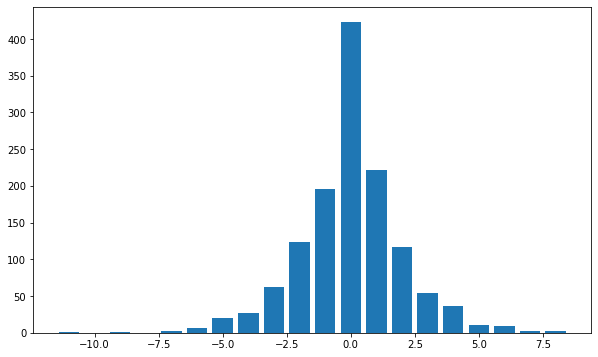

In [17]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

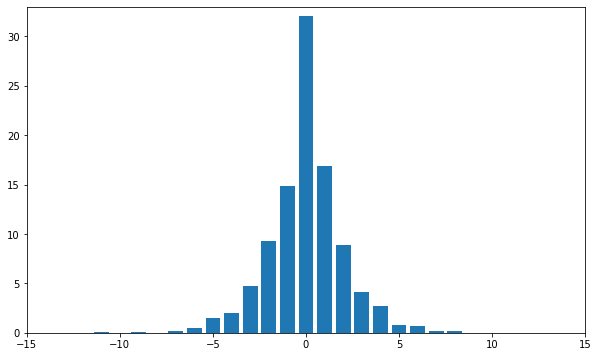

In [21]:
df_freq=pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
delp = list(df_freq['pct'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,delp)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

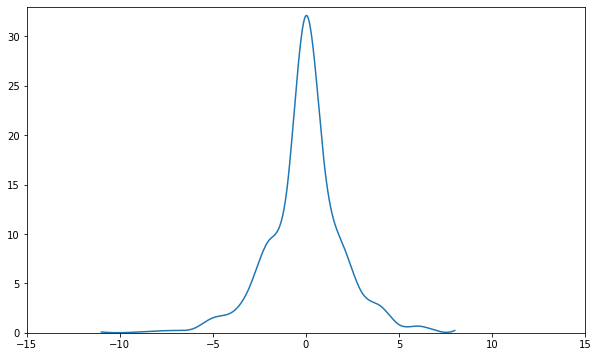

In [43]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(delx), max(delx), 500) 

#define spline
spl = make_interp_spline(delx, delp, k=3)
y_smooth = spl(xnew)

#create smooth line chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

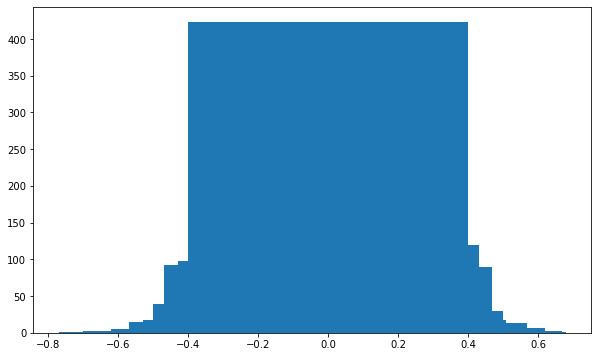

In [12]:
counter=collections.Counter(dlpctList)
dlpy = list(counter.values())
dlpx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dlpx,dlpy)
plt.show()

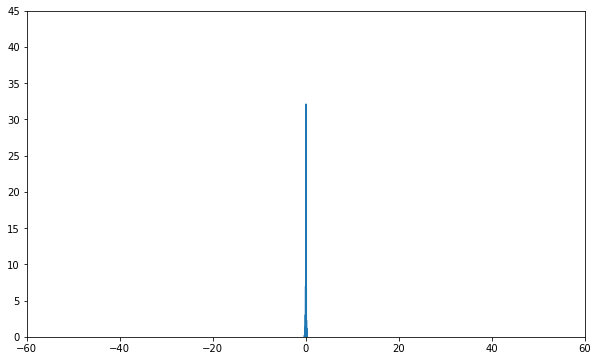

In [14]:
counter=collections.Counter(dlpctList)
dlpy = list(counter.values())
dlpx = list(counter.keys())

df_freq=pd.DataFrame(list(zip(dlpx,dlpy)),columns=['dlpct','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
dlpp = list(df_freq['pct'])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(dlpx), max(dlpx), 500) 

#define spline
spl = make_interp_spline(dlpx, dlpp, k=3)
y_smooth = spl(xnew)

#create smooth line chart`
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
plt.xlim([-60, 60])
plt.ylim([0, 45])
plt.show()

In [15]:
pd.DataFrame(list(zip(dlpx,dlpy,dlpp)),columns=['dlpct','freq','pct'])

,dlpct,freq,pct
0,-0.37,1,0.08
1,-0.32,1,0.08
2,-0.30,2,0.15
3,-0.28,2,0.15
4,-0.27,1,0.08
5,-0.23,3,0.23
6,-0.22,5,0.38
7,-0.21,3,0.23
8,-0.20,1,0.08
9,-0.19,2,0.15


In [19]:
pd.DataFrame(list(zip(delx,dely,delp)),columns=['delta','freq','pct'])

,delta,freq,pct
0,-11,1,0.08
1,-9,1,0.08
2,-7,3,0.23
3,-6,6,0.46
4,-5,20,1.52
5,-4,27,2.05
6,-3,63,4.78
7,-2,123,9.33
8,-1,196,14.87
9,0,423,32.09
